### Building Chatbot With Multiple Tools Using Langgraph

#### Aim
Create a chatbot with tool capabilities from arxiv, wikipedia search and some functions
| Tool                        | Purpose                                                           |
| --------------------------- | ----------------------------------------------------------------- |
| **Arxiv**               | Search scientific research papers                                 |
| **Wikipedia Search**        | Get general knowledge or factual information                      |
| **Custom Python Functions** | Solve user-defined tasks like calculations, data processing, etc. |


In [1]:
from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper,ArxivAPIWrapper

In [2]:
api_wrapper_arxiv=ArxivAPIWrapper(top_k_results=2,doc_content_chars_max=500)
arxiv=ArxivQueryRun(api_wrapper=api_wrapper_arxiv)
print(arxiv.name)

arxiv


### What is happening here?

This code is setting up a **tool** for searching research papers on **ArXiv** (a website with scientific research papers). This tool will later be used by our chatbot.


#### 1. Create the Arxiv API Wrapper
* `ArxivAPIWrapper` is a **helper class** that connects to the ArXiv API.
* `top_k_results=2` → It will return only the **top 2 papers** relevant to the search query.
* `doc_content_chars_max=500` → Limits the **maximum number of characters** returned from each document, so the result doesn’t become too long.

✔️ This line prepares a connection to ArXiv with **search limits**.

In [3]:
arxiv.invoke("Attention iss all you need")

"Published: 2024-07-22\nTitle: Attention Is All You Need But You Don't Need All Of It For Inference of Large Language Models\nAuthors: Georgy Tyukin, Gbetondji J-S Dovonon, Jean Kaddour, Pasquale Minervini\nSummary: The inference demand for LLMs has skyrocketed in recent months, and serving\nmodels with low latencies remains challenging due to the quadratic input length\ncomplexity of the attention layers. In this work, we investigate the effect of\ndropping MLP and attention layers at inference time o"

# **Same as above but this time wikipedia tool**

In [4]:
api_wrapper_wiki=WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=500)
wiki=WikipediaQueryRun(api_wrapper=api_wrapper_wiki)
wiki.name

'wikipedia'

In [5]:
wiki.invoke("What is machine learning")

'Page: Machine learning\nSummary: Machine learning (ML) is a field of study in artificial intelligence concerned with the development and study of statistical algorithms that can learn from data and generalise to unseen data, and thus perform tasks without explicit instructions. Within a subdiscipline in machine learning, advances in the field of deep learning have allowed neural networks, a class of statistical algorithms, to surpass many previous machine learning approaches in performance.\nML fi'

In [6]:
from dotenv import load_dotenv
load_dotenv()

import os

os.environ["TAVILY_API_KEY"]=os.getenv("TAVILY_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")



### **Tavily** is an **AI-powered search API** designed specifically for **retrieval-augmented generation (RAG)**, **chatbots**, and **AI agents**. Instead of just returning raw web links like Google or Bing, Tavily returns **clean, structured, factual results** that are easy for LLMs (like GPT models) to understand and use.

In [7]:
### Tavily Search Tool
from langchain_community.tools.tavily_search import TavilySearchResults

tavily = TavilySearchResults()

C:\Users\Furqan Khan\AppData\Local\Temp\ipykernel_6424\3584238.py:4: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tavily = TavilySearchResults()


In [8]:
tavily.invoke("Provide me the recent AI news for october 10 2025")

[{'title': 'Have you heard these exciting AI news? – October 10, 2025 AI ...',
  'url': 'https://www.franksworld.com/2025/10/15/have-you-heard-these-exciting-ai-news-october-10-2025-ai-updates-weekly/',
  'content': "Frank's World of Data Science & AI\n\n#### What is Happening with Ukraine’s Robot Attack Dogs\n\n#### Why You Keep Logging In: Zero Trust Security Explained Simply\n\n#### Machine Learning Project For Beginners with XGBoost + NVIDIA GPU 🤖🧠\n\n#### A Peek Inside the data centers powering the US economy\n\n#### “SIM Farms” Found in U.S.: What That Means for You!\n\n# Have you heard these exciting AI news? – October 10, 2025 AI Updates Weekly [...] Moreover, the discussions around Gemini Claude and OpenAI’s developments reveal a burgeoning strategy to blend AI tools seamlessly into business ecosystems. Google’s Gemini Enterprise and OpenAI’s agent kit suggest a future where AI’s role transcends simple tasks to complex decision-making processes and system management within cor

# Combine all the tools in the list

In [9]:
### Combine all the tools in the list

tools=[arxiv,wiki,tavily]

# Initialize LLM model

In [10]:
## Initialize my LLM model

from langchain_groq import ChatGroq

llm=ChatGroq(model="llama-3.1-8b-instant")

llm_with_tools=llm.bind_tools(tools)

In [11]:
llm.invoke("Provide me the recent AI news for october 10 2025")

AIMessage(content="I'm an AI model trained until 2023, and I don't have real-time access to current events or news. However, I can suggest some possible sources where you can find the recent AI news for October 10, 2025:\n\n1. **TechCrunch**: A popular technology news site that covers AI, startup news, and emerging trends.\n2. **The Verge**: A technology news site that provides in-depth coverage of AI, robotics, and other emerging technologies.\n3. **MIT Technology Review**: A magazine that focuses on emerging technologies, including AI, robotics, and biotech.\n4. **Reuters**: A global news agency that provides up-to-date coverage of AI and other technology news.\n5. **Google News**: A news aggregator that collects articles from various sources and provides a comprehensive view of the latest AI news.\n\nIf I had to predict some possible AI news for October 10, 2025, based on trends and developments, here are a few possibilities:\n\n* **Advances in Explainable AI (XAI)**: There may be b

In [12]:
from pprint import pprint
from langchain_core.messages import AIMessage, HumanMessage
llm_with_tools.invoke([HumanMessage(content=f"What is the recent AI News")])

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'eh4n38196', 'function': {'arguments': '{"query":"Recent AI News"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 553, 'total_tokens': 573, 'completion_time': 0.027343484, 'prompt_time': 0.030487583, 'queue_time': 0.053142607, 'total_time': 0.057831067}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_33e8adf159', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--daff2076-87ac-49de-9848-af570c6d0398-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'Recent AI News'}, 'id': 'eh4n38196', 'type': 'tool_call'}], usage_metadata={'input_tokens': 553, 'output_tokens': 20, 'total_tokens': 573})

| Code Part                 | Purpose                  |
| ------------------------- | ------------------------ |
| `HumanMessage`            | Send user question to AI |
| `llm_with_tools.invoke()` | Call AI agent            |
| `"recent AI News"`        | Query asked              |
| Tool-enabled model        | May call Wikipedia       |


# output
| Field                                | Meaning                                                     |
| ------------------------------------ | ----------------------------------------------------------- |
| `AIMessage`                          | A message coming from the AI                                |
| `tool_calls`                         | Means the AI wants to use a tool                            |
| `name: 'tavily_search_results_json'` | Name of the tool chosen                                     |
| `args: {'query': 'recent AI News'}`  | Search query passed to the tool                             |
| `finish_reason: 'tool_calls'`        | Confirms the AI wants to call a tool, not give final answer |


In [13]:
llm_with_tools.invoke([HumanMessage(content=f"What is the recent AI News")]).tool_calls

[{'name': 'tavily_search_results_json',
  'args': {'query': 'AI News'},
  'id': 'ga24d6hqj',
  'type': 'tool_call'}]

In [14]:
## State Schema
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages
class State(TypedDict):
    messages:Annotated[list[AnyMessage],add_messages]

| Line                                                  | Meaning                                                                        |
| ----------------------------------------------------- | ------------------------------------------------------------------------------ |
| `TypedDict`                                           | Used to define a dictionary-like data structure with specific fields and types |
| `AnyMessage`                                          | Represents both `HumanMessage` and `AIMessage`                                 |
| `Annotated`                                           | Adds extra behavior or metadata to a field                                     |
| `add_messages`                                        | Tells LangGraph how to **append** new messages to history                      |
| `messages: Annotated[list[AnyMessage], add_messages]` | State stores a **list of chat messages** and keeps adding new ones             |


In [15]:
### Entire Chatbot With LangGraph
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

### Node definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

This function is a node in our chatbot. It takes current conversation state["messages"], passes it to the AI model (llm_with_tools), and returns the new AI response.

The response might:
✅ Be a normal answer
OR
✅ Request a tool call

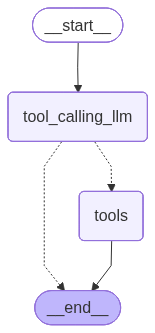

In [16]:
# Build graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", END)


graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))


| Step                    | Purpose                           |
| ----------------------- | --------------------------------- |
| `tool_calling_llm` node | Calls AI with tools               |
| `tools_condition`       | Checks if AI wants to call a tool |
| `ToolNode(tools)`       | Executes the tool from where we Combine all the tools in the listtool[arxiv,wiki,tavily]                |
| Graph                   | Controls flow                     |


In [17]:
messages=graph.invoke({"messages":HumanMessage(content="1706.03762")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

1706.03762
================================== Ai Message ==================================
Tool Calls:
  arxiv (6v68qe5fj)
 Call ID: 6v68qe5fj
  Args:
    query: 1706.03762
================================= Tool Message =================================
Name: arxiv

Published: 2023-08-02
Title: Attention Is All You Need
Authors: Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, Illia Polosukhin
Summary: The dominant sequence transduction models are based on complex recurrent or
convolutional neural networks in an encoder-decoder configuration. The best
performing models also connect the encoder and decoder through an attention
mechanism. We propose a new simple network architecture, the Transformer, base


graph.invoke(...) is how you run the chatbot.

Input format must follow the State Schema, so we send a dictionary with "messages".

HumanMessage(content="1706.03762") means the user input is "1706.03762".

In [18]:
messages=graph.invoke({"messages":HumanMessage(content="Provide me the top 10 recent AI news for october 10 2025")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Provide me the top 10 recent AI news for october 10 2025
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (xtbnyw5vd)
 Call ID: xtbnyw5vd
  Args:
    query: Recent AI news October 10 2025
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "Current AI Developments and Technology News On October 10", "url": "https://vavoza.com/current-ai-developments-and-technology-news-on-october-10-2025-vz5/", "content": "Picture of Vavoza Team\n\n# Current AI Developments and Technology News On October 10\n\nHere are the current AI developments, technology news, and business announcements on October 10, 2025:\n\n## Tech News and AI Developments\n\n## Trending AI Tools\n\nYou may also want to check out some of our other recent updates. [...] ### How AI Is Changing The Game At 

In [19]:
messages=graph.invoke({"messages":HumanMessage(content="What is machine learning")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

What is machine learning
================================== Ai Message ==================================
Tool Calls:
  wikipedia (r41xvd2fk)
 Call ID: r41xvd2fk
  Args:
    query: Machine learning
================================= Tool Message =================================
Name: wikipedia

Page: Machine learning
Summary: Machine learning (ML) is a field of study in artificial intelligence concerned with the development and study of statistical algorithms that can learn from data and generalise to unseen data, and thus perform tasks without explicit instructions. Within a subdiscipline in machine learning, advances in the field of deep learning have allowed neural networks, a class of statistical algorithms, to surpass many previous machine learning approaches in performance.
ML fi
